In [1]:
!pip install seaborn

In [2]:
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
public = pd.read_csv("NCES_public_clean.csv")
public_ela = pd.read_csv("ny-ela-results-2013-2019-public-all.csv")
public_math = pd.read_csv("ny-math-results-2013-2019-public-all.csv")

E:\Anaconda\envs\si649\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8,9,10,11,12,13,14,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
public.columns

Index(['Unnamed: 0', 'School Name',
       'State Name [Public School] Latest available year',
       'State Name [Public School] 2015-16',
       'State Abbr [Public School] Latest available year',
       'School Name [Public School] 2015-16',
       'School ID - NCES Assigned [Public School] Latest available year',
       'Agency Name [Public School] 2015-16',
       'Agency ID - NCES Assigned [Public School] Latest available year',
       'County Name [Public School] 2015-16',
       'County Number [Public School] 2015-16',
       'Web Site URL [Public School] 2015-16',
       'Years School Reported Data [Public School] Latest available year',
       'Location City [Public School] 2015-16',
       'Location State Abbr [Public School] 2015-16',
       'Location ZIP [Public School] 2015-16',
       'School Type [Public School] 2015-16', 'Agency Type [District] 2015-16',
       'Charter School [Public School] 2015-16',
       'Magnet School [Public School] 2015-16',
       'Shared Time

In [5]:
public.rename(columns={'School Name':'name',
                       'Location City [Public School] 2015-16':'location_city',
                       'Location State Abbr [Public School] 2015-16':'state',
                       'Location ZIP [Public School] 2015-16':'zip',
                       'County Name [Public School] 2015-16':'county_name',
                       'Magnet School [Public School] 2015-16':'magnet',
                       'Title I School Status [Public School] 2015-16':'titleI',
                       'Black or African American Students [Public School] 2015-16':'black_african_american',
                       'American Indian/Alaska Native Students [Public School] 2015-16':'india_alaska', 
                       'Asian or Asian/Pacific Islander Students [Public School] 2015-16':'asian_pacific',
                       'Hispanic Students [Public School] 2015-16':'hispanic',
                       'Nat. Hawaiian or Other Pacific Isl. Students [Public School] 2015-16':'hawaiian',
                       'White Students [Public School] 2015-16':'white_student',
                       'Total Race/Ethnicity [Public School] 2015-16':'total_race',
                      'Pupil/Teacher Ratio [Public School] 2015-16':'pupil_teacher_ratio'},inplace=True) 

In [6]:
public.sample(5)

,Unnamed: 0,name,State Name [Public School] Latest available year,State Name [Public School] 2015-16,State Abbr [Public School] Latest available year,School Name [Public School] 2015-16,School ID - NCES Assigned [Public School] Latest available year,Agency Name [Public School] 2015-16,Agency ID - NCES Assigned [Public School] Latest available year,county_name,...,india_alaska,asian_pacific,hispanic,black_african_american,white_student,hawaiian,Two or More Races Students [Public School] 2015-16,total_race,Full-Time Equivalent (FTE) Teachers [Public School] 2015-16,pupil_teacher_ratio
39581,39581,HITE ELEMENTARY,Kentucky,KENTUCKY,KY,Hite Elementary School,2.102990e+11,Jefferson County,2102990.0,Jefferson County,...,0,32,31,65,355,0,23,506.0,25.32,19.98
66891,66891,OSAKIS ELEMENTARY,Minnesota,MINNESOTA,MN,OSAKIS ELEMENTARY,2.725140e+11,OSAKIS PUBLIC SCHOOL DISTRICT,2725140.0,Douglas County,...,0,1,8,6,433,1,1,450.0,29.99,15.01
95808,95808,WEST HANDLEY EL,Texas,TEXAS,TX,WEST HANDLEY EL,4.819700e+11,FORT WORTH ISD,4819700.0,Tarrant County,...,1,6,366,203,28,0,10,614.0,34.98,17.55
90584,90584,TURKEYFOOT VALLEY AREA JSHS,Pennsylvania,PENNSYLVANIA,PA,Turkeyfoot Valley Area JSHS,4.223880e+11,Turkeyfoot Valley Area SD,4223880.0,Somerset County,...,2,0,0,1,186,0,0,189.0,17.50,10.80
15632,15632,CHIEF SEALTH INTERNATIONAL HIGH SCHOOL,Washington,WASHINGTON,WA,Chief Sealth International High School,5.307710e+11,Seattle Public Schools,5307710.0,King County,...,23,194,324,246,291,25,70,1173.0,61.80,18.98


In [7]:
public.location_city.value_counts()

HOUSTON          808
CHICAGO          600
BROOKLYN         598
LOS ANGELES      595
SAN ANTONIO      519
                ... 
FRENCHBORO         1
NATURITA           1
NAUKATI            1
NORTH EASTHAM      1
ROCK POINT         1
Name: location_city, Length: 12641, dtype: int64

Vis1

In [8]:
NY = public[public['location_city']=='NEW YORK']

In [12]:
segregated = alt.Chart(NY).mark_bar().transform_calculate(
    segregated=alt.datum.white_student/alt.datum.total_race
).transform_calculate(
  segregatornot="datum.segregated <= 0.1? '1':'0'"
).transform_joinaggregate(
    groupby=['zip'],
    segregate_school = 'sum(segregatornot)',
    total='count(Unnamed: 0)'
).transform_calculate(
   fraction=alt.datum.segregate_school/alt.datum.total
).encode(
    alt.X('zip:N'),
    alt.Y('fraction:Q',title='Segregated Schools Fraction among Public Schools')
).properties(width=500)
highlight =segregated.mark_bar(color="#e45755").encode(
    alt.X('zip:N'),
    alt.Y('fraction:Q'),
).transform_filter(
    alt.datum.fraction == 1
)

segregated+highlight

alt.LayerChart(...)

In [40]:
public.sample(5)

,Unnamed: 0,name,State Name [Public School] Latest available year,State Name [Public School] 2015-16,State Abbr [Public School] Latest available year,School Name [Public School] 2015-16,School ID - NCES Assigned [Public School] Latest available year,Agency Name [Public School] 2015-16,Agency ID - NCES Assigned [Public School] Latest available year,county_name,...,india_alaska,asian_pacific,hispanic,black_african_american,white_student,hawaiian,Two or More Races Students [Public School] 2015-16,total_race,Full-Time Equivalent (FTE) Teachers [Public School] 2015-16,pupil_teacher_ratio
69191,69191,PEMBROKE ELEMENTARY SCHOOL,Maine,MAINE,ME,Pembroke Elementary School,2.309560e+11,Pembroke Public Schools,2309560.0,Washington County,...,4,0,1,0,75,0,3,83.0,9.50,8.74
57101,57101,MEDFORD HS,Oklahoma,OKLAHOMA,OK,MEDFORD HS,4.019620e+11,MEDFORD,4019620.0,Grant County,...,2,1,6,0,65,0,7,81.0,9.27,8.74
33457,33457,GLENS FALLS MIDDLE SCHOOL,New York,NEW YORK,NY,GLENS FALLS MIDDLE SCHOOL,3.612240e+11,GLENS FALLS CITY SCHOOL DISTRICT,3612240.0,Warren County,...,0,7,23,16,552,–,28,626.0,36.11,17.34
97909,97909,WILLIAM BURNETT ELEMENTARY,California,CALIFORNIA,CA,William Burnett Elementary,6.245000e+10,Milpitas Unified,624500.0,Santa Clara County,...,1,409,113,8,40,11,24,606.0,26.25,23.09
31565,31565,FUNSTON ELEMENTARY SCHOOL,Georgia,GEORGIA,GA,Funston Elementary School,1.301380e+11,Colquitt County,1301380.0,Colquitt County,...,0,2,255,58,181,0,3,499.0,26.30,18.97


In [41]:
public.columns

Index(['Unnamed: 0', 'name',
       'State Name [Public School] Latest available year',
       'State Name [Public School] 2015-16',
       'State Abbr [Public School] Latest available year',
       'School Name [Public School] 2015-16',
       'School ID - NCES Assigned [Public School] Latest available year',
       'Agency Name [Public School] 2015-16',
       'Agency ID - NCES Assigned [Public School] Latest available year',
       'county_name', 'County Number [Public School] 2015-16',
       'Web Site URL [Public School] 2015-16',
       'Years School Reported Data [Public School] Latest available year',
       'location_city', 'state', 'zip', 'School Type [Public School] 2015-16',
       'Agency Type [District] 2015-16',
       'Charter School [Public School] 2015-16', 'magnet',
       'Shared Time School [Public School] 2015-16',
       'Urban-centric Locale [Public School] 2015-16',
       'School-wide Title I [Public School] 2015-16',
       'Title I Eligible School [Public Sc

In [42]:
NY['pupil_teacher_ratio'] == NY["pupil_teacher_ratio"].replace('?€?',0)

42        True
130       True
484       True
485       True
2271      True
          ... 
95740     True
96155     True
100238    True
100239    True
100308    True
Name: pupil_teacher_ratio, Length: 365, dtype: bool

In [43]:
NY[NY['pupil_teacher_ratio']=='†']

,Unnamed: 0,name,State Name [Public School] Latest available year,State Name [Public School] 2015-16,State Abbr [Public School] Latest available year,School Name [Public School] 2015-16,School ID - NCES Assigned [Public School] Latest available year,Agency Name [Public School] 2015-16,Agency ID - NCES Assigned [Public School] Latest available year,county_name,...,india_alaska,asian_pacific,hispanic,black_african_american,white_student,hawaiian,Two or More Races Students [Public School] 2015-16,total_race,Full-Time Equivalent (FTE) Teachers [Public School] 2015-16,pupil_teacher_ratio
42043,42043,INNOVATE MANHATTAN CHARTER SCHOOL,New York,NEW YORK,NY,INNOVATE MANHATTAN CHARTER SCHOOL,3.601045e+11,INNOVATE MANHATTAN CHARTER SCHOOL,3601045.0,New York County,...,†,†,†,†,†,†,†,0.0,†,†
44250,44250,JHS 13 JACKIE ROBINSON,New York,NEW YORK,NY,JHS 13 JACKIE ROBINSON,3.600079e+11,NEW YORK CITY GEOGRAPHIC DISTRICT # 4,3600079.0,New York County,...,†,†,†,†,†,†,†,0.0,†,†
50076,50076,LEGACY SCHOOL FOR INTEGRATED STUDIES,New York,NEW YORK,NY,LEGACY SCHOOL FOR INTEGRATED STUDIES,3.600077e+11,NEW YORK CITY GEOGRAPHIC DISTRICT # 2,3600077.0,New York County,...,†,†,†,†,†,†,†,0.0,†,†
54294,54294,MANHATTAN THEATRE LAB HIGH SCHOOL,New York,NEW YORK,NY,MANHATTAN THEATRE LAB HIGH SCHOOL,3.600078e+11,NEW YORK CITY GEOGRAPHIC DISTRICT # 3,3600078.0,New York County,...,†,†,†,†,†,†,†,0.0,†,†
94433,94433,WASHINGTON IRVING HIGH SCHOOL,New York,NEW YORK,NY,WASHINGTON IRVING HIGH SCHOOL,3.600077e+11,NEW YORK CITY GEOGRAPHIC DISTRICT # 2,3600077.0,New York County,...,†,†,†,†,†,†,†,0.0,†,†


In [44]:
NY["pupil_teacher_ratio"]

42         5.98
130       19.93
484       11.46
485       12.93
2271      18.42
          ...  
95740     13.61
96155     11.07
100238    14.11
100239    12.03
100308    16.05
Name: pupil_teacher_ratio, Length: 365, dtype: object

In [45]:
NY = NY[(NY['pupil_teacher_ratio'] != '–')&(NY['pupil_teacher_ratio']!='†')]

In [46]:
NY = NY[(NY['titleI'] != '–')&(NY['magnet'] != '–')]

In [47]:
magnet_schoolwide = NY[(NY.magnet == '1-Yes')| (NY.titleI == '5-Title I schoolwide school')]

In [48]:
magnet_schoolwide['pupil_teacher_ratio']

2271     18.42
9988      9.14
21613    10.52
23262     8.61
31585    13.40
33122    12.38
36603     9.10
36609    11.41
36610    12.33
42242    14.34
44988    19.73
47235    13.09
47263     9.62
47285    17.62
62229    14.35
62547    13.80
74902     9.93
85053     9.19
86357    12.53
86358    14.79
86359    15.13
86360    11.51
86361    15.18
86362    18.09
86364    18.56
86365    14.81
88508    14.71
Name: pupil_teacher_ratio, dtype: object

In [49]:
NY['pupil_teacher_ratio']=NY['pupil_teacher_ratio'].astype('float')

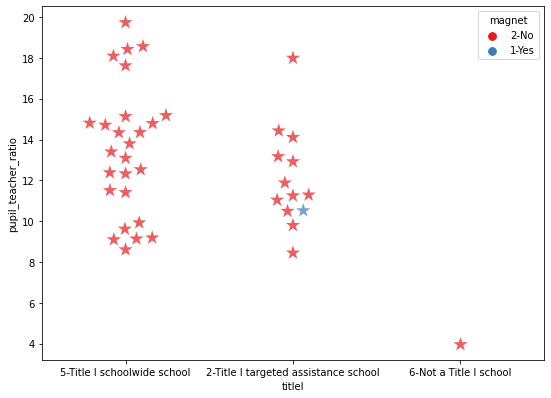

<Figure size 432x288 with 0 Axes>

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 6.5)
sns.swarmplot(x ='titleI', y='pupil_teacher_ratio',hue='magnet',data=NY,marker='*',s=15,alpha=0.7,palette='Set1', ax=ax)
plt.show()
plt.savefig('pupil_teacher_ratio.jpg')

In [13]:
public_math.sample(5)

,Unnamed: 0,id,DBN,School Name,Grade,Year,Category,Number Tested,Mean Scale Score,# Level 1,% Level 1,# Level 2,% Level 2,# Level 3,% Level 3,# Level 4,% Level 4,# Level 3+4,% Level 3+4
14765,14765,15K03852014All Students,15K038,P.S. 038 THE PACIFIC,5,2014,All Students,44,307.7954407,11,25,11,25,14,31.81818199,8,18.18181801,22,50
22043,22043,23K17832014All Students,23K178,P.S. 178 SAINT CLAIR MCKELWAY,3,2014,All Students,43,304.4186096,11,25.5813961,12,27.9069767,17,39.53488541,3,6.976744175,20,46.5116272
367,367,01M184All Grades2016All Students,01M184,P.S. 184M SHUANG WEN,All Grades,2016,All Students,387,344.5167847,19,4.90956068,56,14.47028446,91,23.51421165,221,57.10594177,312,80.62015533
19287,19287,20K19232014All Students,20K192,P.S. 192 - THE MAGNET SCHOOL FOR MATH AND SCIENCE,3,2014,All Students,72,290.0416565,26,36.11111069,29,40.27777863,13,18.05555534,4,5.555555344,17,23.61111069
11225,11225,11X10652016All Students,11X106,P.S. 106 PARKCHESTER,5,2016,All Students,208,300.4230652,80,38.46154022,70,33.65384674,40,19.23077011,18,8.653845787,58,27.88461494


In [14]:
public_math.columns

Index(['Unnamed: 0', 'id', 'DBN', 'School Name', 'Grade', 'Year', 'Category',
       'Number Tested', 'Mean Scale Score', '# Level 1', '% Level 1',
       '# Level 2', '% Level 2', '# Level 3', '% Level 3', '# Level 4',
       '% Level 4', '# Level 3+4', '% Level 3+4'],
      dtype='object')

In [15]:
public_math.columns = public_math.columns.str.lower().str.replace(' ','_')

In [16]:
public_ela.columns = public_ela.columns.str.lower().str.replace(' ','_')

In [17]:
public_math.columns

Index(['unnamed:_0', 'id', 'dbn', 'school_name', 'grade', 'year', 'category',
       'number_tested', 'mean_scale_score', '#_level_1', '%_level_1',
       '#_level_2', '%_level_2', '#_level_3', '%_level_3', '#_level_4',
       '%_level_4', '#_level_3+4', '%_level_3+4'],
      dtype='object')

In [18]:
public_ela.columns

Index(['unnamed:_0', 'id', 'dbn', 'school_name', 'grade', 'year', 'category',
       'number_tested', 'mean_scale_score', '#_level_1', '%_level_1',
       '#_level_2', '%_level_2', '#_level_3', '%_level_3', '#_level_4',
       '%_level_4', '#_level_3+4', '%_level_3+4'],
      dtype='object')

In [19]:
ps8=public_math[(public_math["school_name"]=='P.S. 008 ROBERT FULTON')&(public_math["grade"]=='All Grades')]

In [20]:
ps8_ela=public_ela[(public_ela["school_name"]=='P.S. 008 ROBERT FULTON')&(public_ela["grade"]=='All Grades')]

In [21]:
ps8_bar=alt.Chart(ps8).transform_fold(
    ["%_level_1","%_level_2","%_level_3","%_level_4"],
    as_=["level","percent"]
).mark_bar().encode(
    x = alt.X('year:O'),
    y = alt.Y('percent:Q',title='Math Test Result in P.S.8'),
    color='level:N'  
).properties(width=300)

selection_single = alt.selection_single(encodings=["color"])

colorCondition1 = alt.condition(selection_single,"level:N",alt.value("lightgray"))

c1 = ps8_bar.add_selection(selection_single).encode(
    color= colorCondition1
)

# selection_interval=alt.selection_interval(encodings=["x"])

# colorCondition2 = alt.condition(selection_interval,"Origin",alt.value("gray"))

# c2=ps8_bar.add_selection(selection_interval).encode(
#     color = colorCondition2
# ).properties(title="encoding = x")

# ps8_line=alt.Chart(ps8).mark_line().encode(
#     x = alt.X('year:O'),
#     y = alt.Y('mean_scale_score:Q',title='Math Test Mean Result in P.S.8')
# )
ps8_bar2=alt.Chart(ps8_ela).transform_fold(
    ["%_level_1","%_level_2","%_level_3","%_level_4"],
    as_=["level","percent"]
).mark_bar().encode(
    x = alt.X('year:O'),
    y = alt.Y('percent:Q',title='ELA Test Result in P.S.8'),
    color='level:N'  
).properties(width=300)
# ps8_bar2
# ps8_bar

selection_single = alt.selection_single(encodings=["color"])

colorCondition1 = alt.condition(selection_single,"level:N",alt.value("lightgray"))

c2 = ps8_bar2.add_selection(selection_single).encode(
    color= colorCondition1
)

c2

alt.Chart(...)

In [22]:
ps307=public_math[(public_math["school_name"]=='P.S. 307 DANIEL HALE WILLIAMS')&(public_math["grade"]=='All Grades')]

In [23]:
ps307_ela=public_ela[(public_ela["school_name"]=='P.S. 307 DANIEL HALE WILLIAMS')&(public_ela["grade"]=='All Grades')]

In [24]:
ps307_bar=alt.Chart(ps307).transform_fold(
    ["%_level_1","%_level_2","%_level_3","%_level_4"],
    as_=["level","percent"]
).mark_bar().encode(
    x = alt.X('year:O'),
    y = alt.Y('percent:Q',title='Math Test Result in P.S.307'),
    color='level:N'
).properties(width=300)
selection_single = alt.selection_single(encodings=["color"])

colorCondition1 = alt.condition(selection_single,"level:N",alt.value("lightgray"))

c3 = ps307_bar.add_selection(selection_single).encode(
    color= colorCondition1
)


ps307_bar2 = alt.Chart(ps307_ela).transform_fold(
    ["%_level_1","%_level_2","%_level_3","%_level_4"],
    as_=["level","percent"]
).mark_bar().encode(
    x = alt.X('year:O'),
    y = alt.Y('percent:Q',title='ELA Test Result in P.S.307'),
    color='level:N'  
).properties(width=300)

selection_single = alt.selection_single(encodings=["color"])

colorCondition1 = alt.condition(selection_single,"level:N",alt.value("lightgray"))

c4 = ps307_bar2.add_selection(selection_single).encode(
    color= colorCondition1
)

In [25]:
((c1|c3).resolve_scale(x="shared"))&((c2|c4).resolve_scale(x="shared"))

alt.VConcatChart(...)